In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [46]:
diabetes = pd.read_csv('../Datasets/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
len(diabetes)

768

In [48]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# grab features and target values
X = diabetes[feature_cols]
y = diabetes['Outcome']

# split the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# instantiate model 
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
model.score(X_test,y_test)

0.6927083333333334

In [51]:
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [52]:
130 + 62 # 25% of our dataset 

192

In [53]:
y_pred = model.predict(X_test)

In [54]:
print(y_pred) # predicted values

[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]


In [55]:
print(y_test.values.T) # true values 

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


In [57]:
y = [item for item in y_pred if item ==1]
n = [item for item in y_pred if item ==0]
len(y), len(n)

(27, 165)

## Confusion Matrix

In [58]:
import numpy as np

def comp_yt_yp(y_test, y_predict):
    conf_matrix  = np.zeros((2, 2))
    for m in [0, 1]:
        for n in [0, 1]:
            c = 0
            for (i, j) in zip(y_test, y_predict):
                if (i == m) & (j == n):
                        c += 1
            conf_matrix[m, n] = c 
    return conf_matrix

print(comp_yt_yp(y_test, y_pred))

[[118.  12.]
 [ 47.  15.]]


In [59]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[118  12]
 [ 47  15]]


In [60]:
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,118,12
Actual 1,47,15


### Basic terminology

True Positives (TP): we correctly predicted that they do have diabetes: 15

True Negatives (TN): we correctly predicted that they don't have diabetes: 118

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error"): 12

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error"): 47

<img src="../Images/confusion_matrix.png" width="500" height="500">

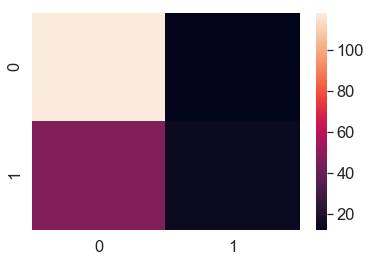

In [61]:
import seaborn as sns 
sns.set(font_scale=1.5)

# create matrix
conf_mat = confusion_matrix(y_test, y_pred)

#plot using seaborn
sns.heatmap(conf_mat);

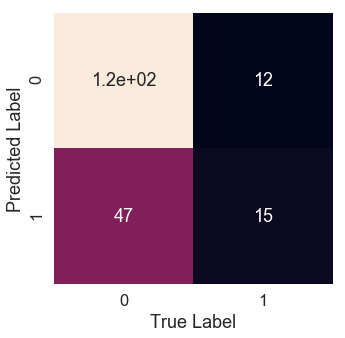

In [62]:
def plot_conf_matrix(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.xlabel('True Label') 
    plt.ylabel('Predicted Label')
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top-0.5);
plot_conf_matrix(conf_mat) 

## The difference between `.predict()` and `.predict_proba` for a classifier

Apply these two methods to Pima Indian Diabetes dataset

https://www.ritchieng.com/machine-learning-evaluate-classification-model/

In [63]:
model.classes_

array([0, 1])

In [64]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [65]:
model.predict_proba(X_test[:10]) #prob of yes(1) or no(0) 

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

## Model Evaluation
***Activity (Reminder): How we can obtain y_pred (whose elements are 0 and 1) from :***

In [66]:
y_pred = model.predict_proba(X_test)
y_pred

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438],
       [0.64244443, 0.35755557],
       [0.25912035, 0.74087965],
       [0.63949765, 0.36050235],
       [0.76987637, 0.23012363],
       [0.57345769, 0.42654231],
       [0.80896485, 0.19103515],
       [0.54236399, 0.45763601],
       [0.8809859 , 0.1190141 ],
       [0.56071047, 0.43928953],
       [0.63038849, 0.36961151],
       [0.55812011, 0.44187989],
       [0.62388338, 0.37611662],
       [0.80183978, 0.19816022],
       [0.58322696, 0.41677304],
       [0.84451719, 0.15548281],
       [0.7468329 , 0.2531671 ],
       [0.90256923, 0.09743077],
       [0.30366288, 0.69633712],
       [0.84641691, 0.15358309],
       [0.7802164 , 0.2197836 ],
       [0.

In [67]:
threshold = y_train.value_counts()[1] / len(y_train)
threshold

0.3576388888888889

In [68]:
def converter(pred_prob):
    array = []
    for x,y in pred_prob:
        if x > 0.5:
            array.append(1)
        else:
            array.append(0)
    return array
print(converter)

<function converter at 0x1188d2d40>


### Apply new threshold of .357 instead of .5 to diabetes class dataset to determine if a person has diabetes

In [69]:
from sklearn.preprocessing import binarize
y_pred_prob_class1 = model.predict_proba(X_test)[:, 1]
y_pred_class_threshold = binarize(y_pred_prob_class1.reshape(1,-1), 0.3576388888888889)[0]
print(y_pred_class_threshold)

[1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [70]:
print(np.array(y_test.T))

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


In [71]:
model.classes_

array([0, 1])

In [72]:
def y_pred_elements(y_pred_prob):
    
    threshold = y_train.value_counts()[1] / len(y_train)
    threshold = .335195
    array = []
    for element in y_pred_prob:
        if element[1] < threshold:
             array.append(0)
        else:
            array.append(1)
    return array
print(y_pred_elements(y_pred))

[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


In [73]:
import numpy as np

def comp_yt_yp(y_test, y_predict):
    conf_matrix  = np.zeros((2, 2))
    for m in [0, 1]:
        for n in [0, 1]:
            c = 0
            for (i, j) in zip(y_test, y_predict):
                if (i == m) & (j == n):
                        c += 1
            conf_matrix[m, n] = c 
    return conf_matrix

print(comp_yt_yp(y_test,y_pred_class_threshold))

[[87. 43.]
 [24. 38.]]
